In [62]:
import pandas as pd
import datetime
import pytz
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import plotly.io as pio

import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold


In [ ]:
df=pd.read_csv("price_window.csv")
df['Datetime_CST'] = pd.to_datetime(min_WTI['Datetime_CST'], errors='coerce')
df['Release_Datetime'] = pd.to_datetime(min_WTI['Datetime_CST'], errors='coerce')
release_time = pd.to_datetime(df['Datetime'].dt.date.astype(str) + ' 09:30:00')
df['min_to_Release'] = (df['Datetime'] - release_time).dt.total_seconds() / 60
# add a column called predict that is 1 if min_to_Release is 2, else 0
df['predict'] = (df['min_to_Release'] == 2).astype(int)
df['Datetime'] = df['Datetime'].dt.date

# Identify which Release_Datetime groups contain at least one predict = 1
valid_releases = df.groupby('Datetime')['predict'].max()
valid_releases = valid_releases[valid_releases == 1].index

#Keep all rows from those groups
df = df[df['Datetime'].isin(valid_releases)]
df = df[df['min_to_Release'] <= 2]
df.to_csv("price_window_valid.csv", index=False)

In [50]:

df=pd.read_csv("price_window.csv")


df['Datetime_CST'] = pd.to_datetime(df['Datetime_CST'], errors='coerce', utc=True)
df['Release_Datetime'] = pd.to_datetime(df['Release_Datetime'], errors='coerce', utc=True)

df['Time_to_Release_Minutes'] = (df['Datetime_CST'] - df['Release_Datetime']).dt.total_seconds() / 60

valid_releases = df.loc[df['Time_to_Release_Minutes'] == 2]
display(valid_releases['Date'])
display(df['Date'])
df = df[df['Date'].isin(valid_releases['Date'])]
df = df[df['Time_to_Release_Minutes'] <= 2]
display(df)
df.to_csv("price_window_valid.csv", index=False)

62       09/03/2011
183      16/03/2011
304      23/03/2011
425      30/03/2011
546      06/04/2011
            ...    
87908    05/02/2025
88029    12/02/2025
88150    20/02/2025
88271    26/02/2025
88392    05/03/2025
Name: Date, Length: 731, dtype: object

0        09/03/2011
1        09/03/2011
2        09/03/2011
3        09/03/2011
4        09/03/2011
            ...    
88446    05/03/2025
88447    05/03/2025
88448    05/03/2025
88449    05/03/2025
88450    05/03/2025
Name: Date, Length: 88451, dtype: object

,Datetime_CST,Date,Time,Open,High,Low,Close,Volume,Datetime,Percent_Change,Release_Datetime,Time_to_Release_Minutes
0,2011-03-09 14:30:00+00:00,09/03/2011,08:30:00,105.56,105.56,105.44,105.46,514.0,2011-03-09 08:30:00,-0.094733,2011-03-09 15:30:00+00:00,-60.0
1,2011-03-09 14:31:00+00:00,09/03/2011,08:31:00,105.46,105.52,105.45,105.46,323.0,2011-03-09 08:31:00,0.000000,2011-03-09 15:30:00+00:00,-59.0
2,2011-03-09 14:32:00+00:00,09/03/2011,08:32:00,105.45,105.47,105.31,105.32,899.0,2011-03-09 08:32:00,-0.132752,2011-03-09 15:30:00+00:00,-58.0
3,2011-03-09 14:33:00+00:00,09/03/2011,08:33:00,105.31,105.37,105.25,105.33,716.0,2011-03-09 08:33:00,0.009495,2011-03-09 15:30:00+00:00,-57.0
4,2011-03-09 14:34:00+00:00,09/03/2011,08:34:00,105.34,105.45,105.31,105.40,660.0,2011-03-09 08:34:00,0.066458,2011-03-09 15:30:00+00:00,-56.0
...,...,...,...,...,...,...,...,...,...,...,...,...
88388,2025-03-05 15:28:00+00:00,05/03/2025,09:28:00,66.18,66.28,66.16,66.27,486.0,2025-03-05 09:28:00,0.135993,2025-03-05 15:30:00+00:00,-2.0
88389,2025-03-05 15:29:00+00:00,05/03/2025,09:29:00,66.27,66.31,66.19,66.22,587.0,2025-03-05 09:29:00,-0.075449,2025-03-05 15:30:00+00:00,-1.0
88390,2025-03-05 15:30:00+00:00,05/03/2025,09:30:00,66.21,66.32,66.10,66.22,940.0,2025-03-05 09:30:00,0.000000,2025-03-05 15:30:00+00:00,0.0
88391,2025-03-05 15:31:00+00:00,05/03/2025,09:31:00,66.22,66.32,66.22,66.25,644.0,2025-03-05 09:31:00,0.045304,2025-03-05 15:30:00+00:00,1.0


In [53]:
def pivot_market_data(df, x_minutes_before, cols_to_pivot=None):
    """
    pivot into wide formate where minutes to release from [-x, 2] are kept as columns for each feature.
    """
    if cols_to_pivot is None:
        cols_to_pivot = ['Open', 'High', 'Low', 'Close', 'Volume']

    df_filtered = df[(df['Time_to_Release_Minutes'] <= 2) & (df['Time_to_Release_Minutes'] >= -x_minutes_before)].copy()

    df_long = df_filtered.melt(
        id_vars=['Datetime', 'Time_to_Release_Minutes', 'Release_Datetime'],
        value_vars=cols_to_pivot,
        var_name='Feature',
        value_name='Value'
    )
    df_long['Feature_min'] = df_long['Feature'] + '_t' + df_long['Time_to_Release_Minutes'].astype(int).astype(str)

    df_wide = df_long.pivot_table(
        index='Release_Datetime',
        columns='Feature_min',
        values='Value'
    ).reset_index()
    cols_to_drop = [col for col in df_wide.columns if 't2' in col and col != 'Close_t2']
    df_wide.drop(columns=cols_to_drop, inplace=True)
    return df_wide

df_wide = pivot_market_data(df, x_minutes_before=60)
display(df_wide)

#df_wide['Date'] = df_wide.apply(lambda x: x['Release_Datetime'].split()[0], axis=1)

display(df_wide.isna().sum().where(df_wide.isna().sum() > 0))

display(df_wide)

df_wide.to_csv("price_window_valid_wide.csv", index=False)



Feature_min,Release_Datetime,Close_t-1,Close_t-10,Close_t-11,Close_t-12,Close_t-13,Close_t-14,Close_t-15,Close_t-16,Close_t-17,...,Volume_t-57,Volume_t-58,Volume_t-59,Volume_t-6,Volume_t-60,Volume_t-7,Volume_t-8,Volume_t-9,Volume_t0,Volume_t1
0,2011-03-09 15:30:00+00:00,105.13,105.15,105.14,105.17,105.19,105.20,105.20,105.33,105.20,...,716.0,899.0,323.0,318.0,514.0,138.0,254.0,252.0,2458.0,2052.0
1,2011-03-16 13:30:00+00:00,98.38,98.44,98.35,98.39,98.35,98.35,98.43,98.53,98.63,...,102.0,127.0,232.0,275.0,401.0,491.0,262.0,190.0,588.0,473.0
2,2011-03-23 13:30:00+00:00,105.36,105.26,105.21,105.19,105.15,105.12,105.02,105.03,105.04,...,262.0,350.0,121.0,111.0,187.0,187.0,466.0,412.0,325.0,983.0
3,2011-03-30 13:30:00+00:00,104.34,104.35,104.36,104.36,104.42,104.39,104.40,104.40,104.40,...,128.0,119.0,201.0,133.0,484.0,382.0,548.0,188.0,280.0,292.0
4,2011-04-06 13:30:00+00:00,108.62,108.48,108.52,108.55,108.52,108.54,108.53,108.59,108.59,...,115.0,29.0,26.0,265.0,37.0,199.0,182.0,86.0,556.0,567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2025-02-05 15:30:00+00:00,71.66,71.61,71.60,71.54,71.53,71.57,71.55,71.61,71.63,...,284.0,313.0,319.0,246.0,547.0,206.0,379.0,513.0,2069.0,929.0
727,2025-02-12 15:30:00+00:00,72.10,72.04,72.09,72.11,72.07,72.07,72.05,72.02,72.05,...,476.0,188.0,202.0,159.0,491.0,109.0,183.0,140.0,1269.0,515.0
728,2025-02-20 17:00:00+00:00,72.71,72.75,72.72,72.71,72.70,72.72,72.75,72.77,72.77,...,111.0,166.0,140.0,100.0,158.0,109.0,76.0,94.0,932.0,325.0
729,2025-02-26 15:00:00+00:00,68.93,68.94,68.89,68.86,68.88,68.94,68.93,68.83,68.82,...,571.0,640.0,1314.0,160.0,989.0,226.0,263.0,260.0,477.0,349.0


Feature_min
Release_Datetime   NaN
Close_t-1          NaN
Close_t-10         NaN
Close_t-11         NaN
Close_t-12         NaN
                    ..
Volume_t-7         NaN
Volume_t-8         NaN
Volume_t-9         NaN
Volume_t0          NaN
Volume_t1          NaN
Length: 312, dtype: float64

Feature_min,Release_Datetime,Close_t-1,Close_t-10,Close_t-11,Close_t-12,Close_t-13,Close_t-14,Close_t-15,Close_t-16,Close_t-17,...,Volume_t-57,Volume_t-58,Volume_t-59,Volume_t-6,Volume_t-60,Volume_t-7,Volume_t-8,Volume_t-9,Volume_t0,Volume_t1
0,2011-03-09 15:30:00+00:00,105.13,105.15,105.14,105.17,105.19,105.20,105.20,105.33,105.20,...,716.0,899.0,323.0,318.0,514.0,138.0,254.0,252.0,2458.0,2052.0
1,2011-03-16 13:30:00+00:00,98.38,98.44,98.35,98.39,98.35,98.35,98.43,98.53,98.63,...,102.0,127.0,232.0,275.0,401.0,491.0,262.0,190.0,588.0,473.0
2,2011-03-23 13:30:00+00:00,105.36,105.26,105.21,105.19,105.15,105.12,105.02,105.03,105.04,...,262.0,350.0,121.0,111.0,187.0,187.0,466.0,412.0,325.0,983.0
3,2011-03-30 13:30:00+00:00,104.34,104.35,104.36,104.36,104.42,104.39,104.40,104.40,104.40,...,128.0,119.0,201.0,133.0,484.0,382.0,548.0,188.0,280.0,292.0
4,2011-04-06 13:30:00+00:00,108.62,108.48,108.52,108.55,108.52,108.54,108.53,108.59,108.59,...,115.0,29.0,26.0,265.0,37.0,199.0,182.0,86.0,556.0,567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2025-02-05 15:30:00+00:00,71.66,71.61,71.60,71.54,71.53,71.57,71.55,71.61,71.63,...,284.0,313.0,319.0,246.0,547.0,206.0,379.0,513.0,2069.0,929.0
727,2025-02-12 15:30:00+00:00,72.10,72.04,72.09,72.11,72.07,72.07,72.05,72.02,72.05,...,476.0,188.0,202.0,159.0,491.0,109.0,183.0,140.0,1269.0,515.0
728,2025-02-20 17:00:00+00:00,72.71,72.75,72.72,72.71,72.70,72.72,72.75,72.77,72.77,...,111.0,166.0,140.0,100.0,158.0,109.0,76.0,94.0,932.0,325.0
729,2025-02-26 15:00:00+00:00,68.93,68.94,68.89,68.86,68.88,68.94,68.93,68.83,68.82,...,571.0,640.0,1314.0,160.0,989.0,226.0,263.0,260.0,477.0,349.0


Starting with xgboost on just the price data as a baseline

In [ ]:
price_window_wide = pd.read_csv('price_window_valid_wide.csv')

display(price_window_wide)


,Datetime,Close_t-1,Close_t-10,Close_t-11,Close_t-12,Close_t-13,Close_t-14,Close_t-15,Close_t-16,Close_t-17,...,Volume_t-58,Volume_t-59,Volume_t-6,Volume_t-60,Volume_t-7,Volume_t-8,Volume_t-9,Volume_t0,Volume_t1,Volume_t2
0,2011-03-09,105.13,105.15,105.14,105.17,105.19,105.20,105.20,105.33,105.20,...,899.0,323.0,318.0,514.0,138.0,254.0,252.0,2458.0,2052.0,1250.0
1,2011-06-02,100.31,100.47,100.48,100.38,100.51,100.47,100.44,100.56,100.62,...,410.0,466.0,193.0,412.0,153.0,120.0,178.0,252.0,354.0,297.0
2,2011-07-07,98.48,98.39,98.38,98.41,98.50,98.48,98.59,98.59,98.60,...,330.0,484.0,315.0,466.0,817.0,177.0,224.0,376.0,712.0,232.0
3,2011-09-08,89.60,89.57,89.55,89.52,89.52,89.48,89.45,89.61,89.64,...,332.0,598.0,145.0,650.0,505.0,142.0,230.0,169.0,383.0,271.0
4,2011-10-13,83.68,83.59,83.45,83.58,83.50,83.63,83.66,83.61,83.58,...,868.0,3401.0,388.0,883.0,256.0,229.0,274.0,364.0,944.0,562.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2025-01-29,73.35,73.35,73.36,73.36,73.48,73.42,73.51,73.59,73.67,...,246.0,199.0,448.0,627.0,193.0,270.0,127.0,1286.0,663.0,393.0
245,2025-02-05,71.66,71.61,71.60,71.54,71.53,71.57,71.55,71.61,71.63,...,313.0,319.0,246.0,547.0,206.0,379.0,513.0,2069.0,929.0,673.0
246,2025-02-12,72.10,72.04,72.09,72.11,72.07,72.07,72.05,72.02,72.05,...,188.0,202.0,159.0,491.0,109.0,183.0,140.0,1269.0,515.0,624.0
247,2025-02-26,68.97,69.04,69.03,69.07,69.08,69.07,69.01,68.96,68.96,...,292.0,364.0,131.0,495.0,77.0,195.0,195.0,828.0,717.0,580.0


In [ ]:
import xgboost as xgb


column_names = []
variable_names = ['Close', 'Open', 'High', 'Low', 'Volume']
for var_name in variable_names:
    for min in range(60):
        column_names.append(f'{var_name}_t{min-60}')

column_names.append('Close_t2')
column_names.append('Open_t0')

print(column_names)

display(price_window_wide.columns)
print(len(column_names))

X = price_window_wide[column_names]
y = price_window_wide['Close_t2']


n_estimators_grid = [200, 400, 600]
alpha_grid = [10**-k for k in [1, 3, 5, 7]]

tscv = TimeSeriesSplit(n_splits=3)
results = []

for fold, (train_index_full, test_index_full) in enumerate(tscv.split(X)):

    X_train_fold_full, y_train_fold_full = X.iloc[train_index_full], y.iloc[train_index_full]
    X_test_fold_full, y_test_fold_full = X.iloc[test_index_full], y.iloc[test_index_full]

    test_fold_length = len(X_test_fold_full)
    val_length = test_fold_length // 2

    X_val, y_val = X_test_fold_full.iloc[:val_length], y_test_fold_full.iloc[:val_length]

    X_train_sampled = X_train_fold_full.sample(frac=0.1, random_state=42)

    y_train_sampled = y_train_fold_full.loc[X_train_sampled.index]

    for n_est in n_estimators_grid:
        for alpha in alpha_grid:

            model = xgb.XGBRegressor(n_estimators=n_est,
                                     reg_alpha=alpha, # Using alpha_val for L1 regularization
                                     random_state=42,
                                     n_jobs=-1,
                                     objective='reg:squarederror')

            model.fit(X_train_sampled, np.ravel(y_train_sampled))

            y_pred_val = model.predict(X_val)

            val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

            results.append({
                'n_estimators': n_est,
                'ccp_alpha': alpha,
                'fold': fold + 1,
                'val_rmse': val_rmse
            })

results_df = pd.DataFrame(results)

average_rmse_across_folds = results_df.groupby(['n_estimators', 'ccp_alpha'])['val_rmse'].mean().reset_index()

best_params_row = average_rmse_across_folds.loc[average_rmse_across_folds['val_rmse'].idxmin()]

best_n_estimators = best_params_row['n_estimators']
best_alpha = best_params_row['ccp_alpha']
best_avg_rmse = best_params_row['val_rmse']

print("Best hyperparameters:")
print(f"  n_estimators: {best_n_estimators}")

print(f"  ccp_alpha: {best_alpha}")
print(f"  Average Validation RMSE: {best_avg_rmse:.4f}")


['Close_t-60', 'Close_t-59', 'Close_t-58', 'Close_t-57', 'Close_t-56', 'Close_t-55', 'Close_t-54', 'Close_t-53', 'Close_t-52', 'Close_t-51', 'Close_t-50', 'Close_t-49', 'Close_t-48', 'Close_t-47', 'Close_t-46', 'Close_t-45', 'Close_t-44', 'Close_t-43', 'Close_t-42', 'Close_t-41', 'Close_t-40', 'Close_t-39', 'Close_t-38', 'Close_t-37', 'Close_t-36', 'Close_t-35', 'Close_t-34', 'Close_t-33', 'Close_t-32', 'Close_t-31', 'Close_t-30', 'Close_t-29', 'Close_t-28', 'Close_t-27', 'Close_t-26', 'Close_t-25', 'Close_t-24', 'Close_t-23', 'Close_t-22', 'Close_t-21', 'Close_t-20', 'Close_t-19', 'Close_t-18', 'Close_t-17', 'Close_t-16', 'Close_t-15', 'Close_t-14', 'Close_t-13', 'Close_t-12', 'Close_t-11', 'Close_t-10', 'Close_t-9', 'Close_t-8', 'Close_t-7', 'Close_t-6', 'Close_t-5', 'Close_t-4', 'Close_t-3', 'Close_t-2', 'Close_t-1', 'Open_t-60', 'Open_t-59', 'Open_t-58', 'Open_t-57', 'Open_t-56', 'Open_t-55', 'Open_t-54', 'Open_t-53', 'Open_t-52', 'Open_t-51', 'Open_t-50', 'Open_t-49', 'Open_t-48',

Index(['Datetime', 'Close_t-1', 'Close_t-10', 'Close_t-11', 'Close_t-12',
       'Close_t-13', 'Close_t-14', 'Close_t-15', 'Close_t-16', 'Close_t-17',
       ...
       'Volume_t-58', 'Volume_t-59', 'Volume_t-6', 'Volume_t-60', 'Volume_t-7',
       'Volume_t-8', 'Volume_t-9', 'Volume_t0', 'Volume_t1', 'Volume_t2'],
      dtype='object', length=316)

302
Best hyperparameters:
  n_estimators: 200.0
  ccp_alpha: 1e-07
  Average Validation RMSE: 9.6636


Test set RMSE for each fold:
  Fold 1: 3.3400630926421058
  Fold 2: 1.8030349112014858
  Fold 3: 0.9455754423206792
RMSE of Best Fitting Model: 2.0295578153880904


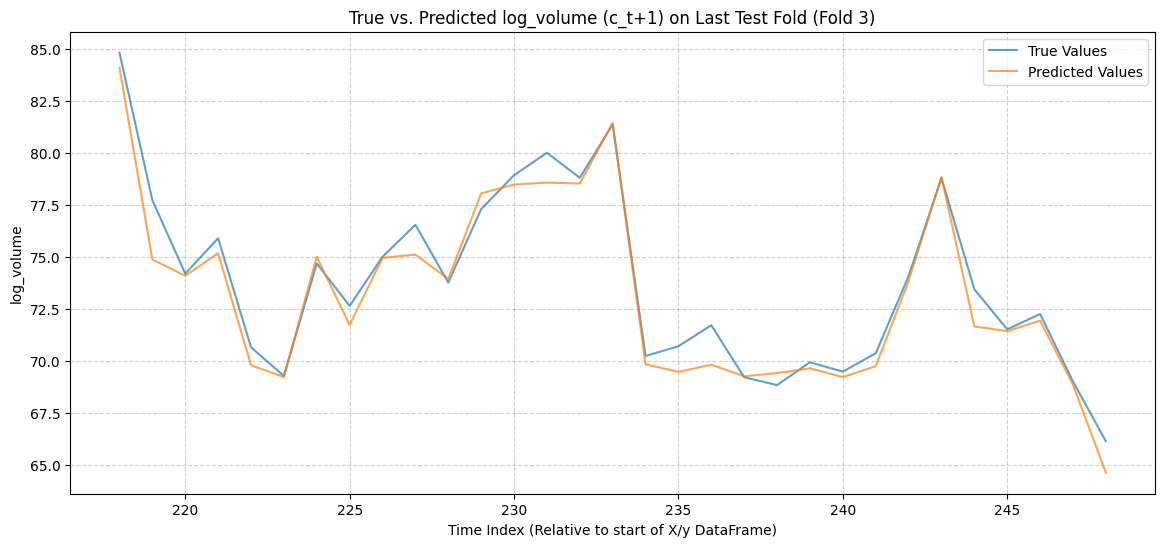

In [68]:
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)

test_rmses = []
last_fold_true = None
last_fold_pred = None

for fold, (train_index_full, test_index_full) in enumerate(tscv.split(X)):
    X_train_fold_full, y_train_fold_full = X.iloc[train_index_full], y.iloc[train_index_full]
    X_test_fold_full, y_test_fold_full = X.iloc[test_index_full], y.iloc[test_index_full]

    test_fold_length = len(X_test_fold_full)
    val_length = test_fold_length // 2

    X_test_final = X_test_fold_full.iloc[val_length:]
    y_test_final = y_test_fold_full.iloc[val_length:]

    best_model = xgb.XGBRegressor(n_estimators=int(best_n_estimators),
                                       reg_alpha=best_alpha,
                                       random_state=42,
                                       n_jobs=-1)

    best_model.fit(X_train_fold_full, np.ravel(y_train_fold_full))

    y_pred_test = best_model.predict(X_test_final)

    test_rmse = np.sqrt(mean_squared_error(y_test_final, y_pred_test))
    test_rmses.append(test_rmse)

    if fold == n_splits - 1:
        last_fold_true = y_test_final.values
        last_fold_pred = y_pred_test
        last_fold_index = y_test_final.index

print("Test set RMSE for each fold:")
for i, rmse in enumerate(test_rmses):
    print(f"  Fold {i+1}: {rmse}")

print(f"RMSE of Best Fitting Model: {np.mean(test_rmses)}")


if last_fold_true is not None and last_fold_pred is not None:
    plt.figure(figsize=(14, 6))
    plt.plot(last_fold_index, last_fold_true, label='True Values', alpha=0.7)
    plt.plot(last_fold_index, last_fold_pred, label='Predicted Values', alpha=0.7)
    plt.title(f'True vs. Predicted log_volume (c_t+1) on Last Test Fold (Fold {n_splits})')
    plt.xlabel('Time Index (Relative to start of X/y DataFrame)')
    plt.ylabel('log_volume')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

C:\Users\evans\AppData\Local\Temp\ipykernel_51524\3215464500.py:33: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

C:\Users\evans\AppData\Local\Temp\ipykernel_51524\3215464500.py:33: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

C:\Users\evans\AppData\Local\Temp\ipykernel_51524\3215464500.py:33: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

C:\Users\evans\AppData\Local\Temp\ipykernel_51524\3215464500.py:33: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

C:\Users\evans\AppData\Local\Temp\ipykernel_51524\3215464500

Optimal Parameters: (200, 0.001)
Minimum RMSE (Validation): [np.float64(15.276805010048372), np.float64(6.9022107112313185), np.float64(6.929746788292303)]


C:\Users\evans\AppData\Local\Temp\ipykernel_51524\3215464500.py:48: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

C:\Users\evans\AppData\Local\Temp\ipykernel_51524\3215464500.py:48: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

C:\Users\evans\AppData\Local\Temp\ipykernel_51524\3215464500.py:48: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



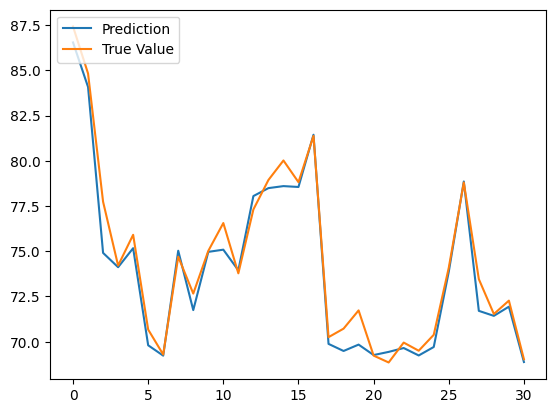

Minimum RMSE (Validation): 2.0086771851606104


In [ ]:
def time_series_valid_test(X, y, n_split, valid_or_test, n_estimators_list, ccp_alpha_list, optimal_par=None):
    np.random.seed(42)
    tscv = TimeSeriesSplit(n_splits=n_split)
    rf_rmse = []
    rmseSmall = []
    param_combinations = []  # param combo storagae
    i = 0  # fold counter
    for train_index, test_index in tscv.split(X):
        i += 1
        # Break test set into 50% validation set, 50% test set
        break_test_ind = int(test_index[0] + 0.5*(test_index[-1]-test_index[0]))
        valid_index = np.array(list(range(test_index[0],break_test_ind)))
        test_index = np.array(list(range(break_test_ind,test_index[-1])))

        # Split data into training, validation, and test sets
        X_train, X_valid, X_test = X.iloc[train_index], X.iloc[valid_index], X.iloc[test_index]
        y_train, y_valid, y_test = y.iloc[train_index], y.iloc[valid_index], y.iloc[test_index]

        # Tuning
        if valid_or_test == "valid":
            rf_rmse_fold = []
            for n_estimators in n_estimators_list:
                for ccp_alpha in ccp_alpha_list:
                    model_rf = xgb.XGBRegressor(random_state=42,
                                                n_estimators=n_estimators,
                                                reg_alpha=ccp_alpha,
                                                n_jobs=-1)


                    X_train_sample = X_train.sample(frac=0.1, random_state=42)
                    y_train_sample = y_train.loc[X_train_sample.index]

                    model_rf.fit(X_train_sample, y_train_sample.ravel())


                    y_val_rf = model_rf.predict(X_valid)
                    fold_rmse = np.sqrt(mean_squared_error(y_valid, y_val_rf))
                    rf_rmse_fold.append(fold_rmse)
                    param_combinations.append((n_estimators, ccp_alpha))

            rf_rmse.append(np.mean(rf_rmse_fold))

        if valid_or_test == "test":
            model_rf = xgb.XGBRegressor(random_state=42,
                                             n_estimators=optimal_par[0],
                                             reg_alpha=optimal_par[1],
                                             n_jobs=-1)
            model_rf.fit(X_train, y_train.ravel())
            y_test_rf = model_rf.predict(X_test)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_test_rf))
            rf_rmse.append(test_rmse)
            rmseSmall.append(np.sqrt(np.sum((y_test.shift(-1)[:-1] - y_test[:-1])**2)/len(y_test.shift(-1))))

            # Plot the prediction for the last CV fold
            if i == n_split:
                plt.plot(range(len(X_test)), y_test_rf, label="Prediction")
                plt.plot(range(len(X_test)), y_test, label="True Value")
                plt.legend(loc="upper left")
                plt.show()

    # Return results
    if valid_or_test == "valid":
        min_rmse_idx = np.argmin(rf_rmse)  # Find index of lowest RMSE
        optimal_params = param_combinations[min_rmse_idx]  # Retrieve corresponding parameters
        return rf_rmse, optimal_params
    if valid_or_test == "test":
        rf_rmse = np.mean(rf_rmse)
        rmseSmallAns = np.mean(rmseSmall)
        return rf_rmse, y_test_rf, rmseSmallAns

n_estimators_list = [200, 400, 600]
ccp_alpha_list = [10**-2, 10**-3, 10**-5, 10**-7]


rf_rmse, optimal_params = time_series_valid_test(X, y, n_split = 3, valid_or_test = "valid",
                                                 n_estimators_list = n_estimators_list,
                                                 ccp_alpha_list = ccp_alpha_list)


print("Optimal Parameters:", optimal_params)
print("Minimum RMSE (Validation):", rf_rmse)

test_rmse, preddictions, smallRMSE = time_series_valid_test(X, y, n_split = 3, valid_or_test = "test",
                                                 n_estimators_list = n_estimators_list,
                                                 ccp_alpha_list = ccp_alpha_list,
                                                 optimal_par=optimal_params)

print("Minimum RMSE (test):", test_rmse)

In [101]:
#weekly_prod
#net_import_crude
#weekly_supply WCESTUS1

weekly_prod=pd.read_csv("weekly_prod.csv", header=2)
weekly_import=pd.read_csv("net_import.csv")
weekly_supply=pd.read_csv("weekly_supply.csv", header=2)

In [ ]:
display(weekly_prod) #thou per day
display(weekly_import)  #thou per day
display(weekly_supply)
column_to_keep = 'Weekly U.S. Ending Stocks excluding SPR of Crude Oil (Thousand Barrels)'

weekly_supply = weekly_supply[['Date', 'Weekly U.S. Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)']]
display(weekly_supply)

weekly_prod[]

,Date,Weekly U.S. Field Production of Crude Oil (Thousand Barrels per Day)
0,"Jan 07, 1983",8634.0
1,"Jan 14, 1983",8634.0
2,"Jan 21, 1983",8634.0
3,"Jan 28, 1983",8634.0
4,"Feb 04, 1983",8660.0
...,...,...
2206,"May 09, 2025",13387.0
2207,"May 16, 2025",13392.0
2208,"May 23, 2025",13401.0
2209,"May 30, 2025",13408.0


,Date,Weekly Net Import
0,"Nov 09, 2001",9639.0
1,"Nov 16, 2001",8879.0
2,"Nov 23, 2001",8187.0
3,"Nov 30, 2001",9856.0
4,"Dec 07, 2001",8966.0
...,...,...
1225,"May 02, 2025",2050.0
1226,"May 09, 2025",2472.0
1227,"May 16, 2025",2582.0
1228,"May 23, 2025",2050.0


,Date,Weekly U.S. Ending Stocks excluding SPR of Crude Oil (Thousand Barrels)
0,"Aug 20, 1982",338764.0
1,"Aug 27, 1982",336138.0
2,"Sep 24, 1982",335586.0
3,"Oct 01, 1982",334786.0
4,"Oct 08, 1982",335260.0
...,...,...
2223,"May 09, 2025",441830.0
2224,"May 16, 2025",443158.0
2225,"May 23, 2025",440363.0
2226,"May 30, 2025",436059.0


,Date,Weekly U.S. Ending Stocks excluding SPR of Crude Oil (Thousand Barrels)
0,"Aug 20, 1982",338764.0
1,"Aug 27, 1982",336138.0
2,"Sep 24, 1982",335586.0
3,"Oct 01, 1982",334786.0
4,"Oct 08, 1982",335260.0
...,...,...
2223,"May 09, 2025",441830.0
2224,"May 16, 2025",443158.0
2225,"May 23, 2025",440363.0
2226,"May 30, 2025",436059.0
